In [3]:
from netCDF4 import Dataset
from glob import glob
import numpy as np

from wrf import getvar, ALL_TIMES, extract_times

Text(0.5, 0.98, 'Difference of Variables Value Between Two Runs')

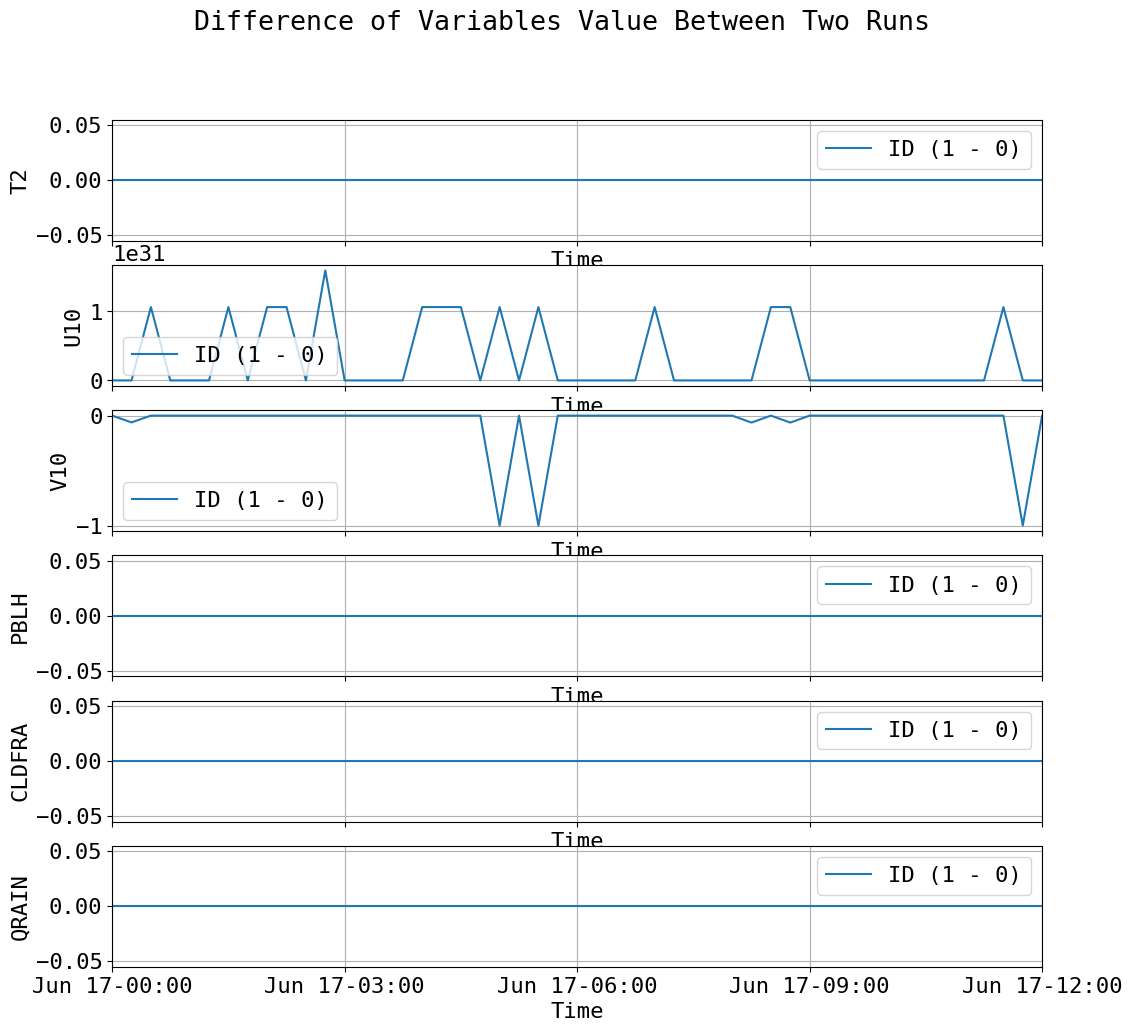

In [5]:
import matplotlib.pyplot as plt

RUN_ID_1 = 0
RUN_ID_2 = 1

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'DejaVu Sans Mono'
# plt.subplots_adjust(wspace=0.7)

import matplotlib.dates as mdates

times = [] 

ANALYZE_VARS = ['T2', 'U10', 'V10', 'PBLH', 'CLDFRA', 'QRAIN']
fig, axes = plt.subplots(len(ANALYZE_VARS), 1, figsize=(12, 11), sharex=True)

file_name_1 = glob(f'/home/guc/runs/{RUN_ID_1:03}-*/wrfout*')[0]
file_name_2 = glob(f'/home/guc/runs/{RUN_ID_2:03}-*/wrfout*')[0]
dataset_1 = Dataset(file_name_1)
dataset_2 = Dataset(file_name_2)

if len(times) == 0:
    times = extract_times(dataset_1, timeidx=ALL_TIMES)

for j, var_name in enumerate(ANALYZE_VARS):
    var_values_1 = getvar(dataset_1, var_name, timeidx=ALL_TIMES)
    var_values_2 = getvar(dataset_2, var_name, timeidx=ALL_TIMES)
    var_values = var_values_2 - var_values_1
    if (len(var_values.shape) <= 3):
        mean_var_values = np.mean(var_values, axis=(1, 2))
    else:
        mean_var_values = np.mean(var_values, axis=(1, 2, 3))

    axes[j].plot(times, mean_var_values, label=f"ID ({RUN_ID_2} - {RUN_ID_1})")
    axes[j].legend()
    axes[j].grid()
    axes[j].set_xlabel('Time')
    axes[j].xaxis.set_major_formatter(mdates.DateFormatter('%b %d-%H:%M'))
    axes[j].set_xticks(times[::len(times)//4])
    axes[j].set_ylabel(var_name)
    axes[j].set_xlim(times[0], times[-1])

# axes[0][0].set_title('Time Series of Mean Temperature vs. AHE Value')
# axes[0][1].set_title('Time Series of Mean Temperature in Urban Area vs. AHE Value')
#
# axes[1][0].set_title('Time Series of Max Temperature vs. AHE Value')
# axes[1][1].set_title('Time Series of Max Temperature in Urban Area vs. AHE Value')

fig.suptitle('Difference of Variables Value Between Two Runs')

# plt.savefig('/home/guc/results/mean-vars-diff-landuse.png')